In [21]:
import pandas as pd
from netCDF4 import Dataset
import xarray as xr
import numpy as np
from siphon import catalog
from sklearn.tree import DecisionTreeRegressor
from dask.distributed import Client, LocalCluster
import matplotlib.pyplot as plt

In [ ]:
# Reading in regional sea level rise data from 4 projection pathways. Also weighting them according to latitude and longitude weights.

ssp126_values = xr.open_dataset( 
    "TAS_projections/ssp126-outputs.nc"
).sel(member=1, drop=True)
weights = np.cos(np.deg2rad(ssp126_values['lat'])).rename('weights')       
ssp126_weighted = ssp126_values['tas'].weighted(weights).mean(['lat', 'lon'], skipna=True)
app_years = np.array(ssp126_weighted['time'])
ssp126_weighted = np.array(ssp126_weighted)

ssp245_values = xr.open_dataset( 
    "TAS_projections/ssp245-outputs.nc"
).sel(member=1, drop=True)
weights = np.cos(np.deg2rad(ssp245_values['lat'])).rename('weights')       
ssp245_weighted = np.array(ssp245_values['tas'].weighted(weights).mean(['lat', 'lon'], skipna=True))  

ssp370_values = xr.open_dataset( 
    "TAS_projections/ssp370-outputs.nc"
).sel(member=1, drop=True)
weights = np.cos(np.deg2rad(ssp370_values['lat'])).rename('weights')       
ssp370_weighted = np.array(ssp370_values['tas'].weighted(weights).mean(['lat', 'lon'], skipna=True))

ssp585values = xr.open_dataset( 
    "TAS_projections/ssp585-outputs.nc"
).sel(member=1, drop=True)
weights = np.cos(np.deg2rad(ssp585values['lat'])).rename('weights')       
ssp585_weighted = np.array(ssp585values['tas'].weighted(weights).mean(['lat', 'lon'], skipna=True))

In [23]:
temp_projections_df = pd.DataFrame({
    'year': app_years,
    'temperature-ssp126': ssp126_weighted,
    'temperature-ssp245': ssp245_weighted,
    'temperature-ssp370': ssp370_weighted,
    'temperature-ssp585': ssp585_weighted
})

In [ ]:
# Converting to csv files for future ease of use

temp_projections_df[['year', 'temperature-ssp126']].rename(columns={'temperature-ssp126': 'temperature'}).to_csv('projections/ssp126_tas_projections.csv', index=False)
temp_projections_df[['year', 'temperature-ssp245']].rename(columns={'temperature-ssp126': 'temperature'}).to_csv('projections/ssp245_tas_projections.csv', index=False)
temp_projections_df[['year', 'temperature-ssp370']].rename(columns={'temperature-ssp126': 'temperature'}).to_csv('projections/ssp370_tas_projections.csv', index=False)
temp_projections_df[['year', 'temperature-ssp585']].rename(columns={'temperature-ssp126': 'temperature'}).to_csv('projections/ssp585_tas_projections.csv', index=False)

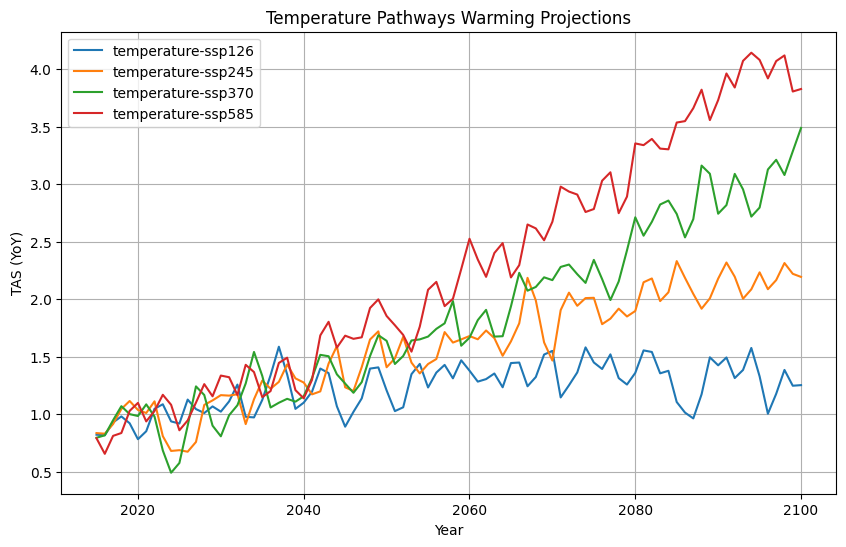

In [ ]:
# Graph showing the different TAS deltas for the 4 projection pathways

plt.figure(figsize=(10, 6))

for col in temp_projections_df.columns:
    if col != "year":
        plt.plot(temp_projections_df["year"], temp_projections_df[col], label=col)

plt.xlabel("Year")
plt.ylabel("TAS (YoY)")
plt.title("Temperature Pathways Warming Projections")
plt.legend()
plt.grid(True)

plt.show()


In [28]:
test_output = xr.open_dataset( 
    "../BRICK_LSL_KeyWest_RCP85.nc"
)

In [29]:
test_output

<xarray.Dataset> Size: 11MB
Dimensions:              (time_proj: 251, ens: 10589)
Coordinates:
  * time_proj            (time_proj) float64 2kB 1.85e+03 1.851e+03 ... 2.1e+03
  * ens                  (ens) float64 85kB 1.0 2.0 3.0 ... 1.059e+04 1.059e+04
Data variables:
    LocalSeaLevel_RCP85  (ens, time_proj) float32 11MB ...